In [1]:
import No_ML as nml
import ML_method as mlm
import Model_Test as mt
import matplotlib.pyplot as plt
import numpy as np
from  matplotlib.colors import LogNorm

In [13]:
import pickle
with open(r"unbalanced-thr2-linear.pkl", 'rb') as file:
    svmIMB = pickle.load(file)

In [14]:
with open(r"balanced-svm-thr2.pkl", 'rb') as file:
    svmB = pickle.load(file)

# I. Scaling

These scalograms were computed from a frequency sweep conducted on a Wing Engine which I was told could display mode interactions. There are 11 of them corresponding to 11 captors on the engine.

In [17]:
f0 = 14 # initial frequency (Hz)
fend = 20 # final frequency (Hz)
fs = 995.6333 # sampling frequency
fnorm = np.linspace(0, 6, 120) # Vector of frequency ratios

In [18]:
Npoint=358428
t=1/fs
Tsimul=(Npoint-1)*t
T=np.linspace(0,Tsimul,Npoint)

Uploading and scaling the files

In [ ]:
cwts=[]
scaledwts=[0]*11
freqs=[]
for i in range(1,12):
    title = 'exp-'+str(i)+'.csv'
    cwt = np.genfromtxt('demo_files/cwt-'+title, delimiter=",", dtype=float)
    freq = np.genfromtxt('demo_files/freq-'+title, delimiter=",", dtype=float)
    cwts.append(cwt)
    freqs.append(freq)
    scaledwts[i-1]=nml.scale(cwts[i-1],freqs[i-1],f0,fend)
    print(i)

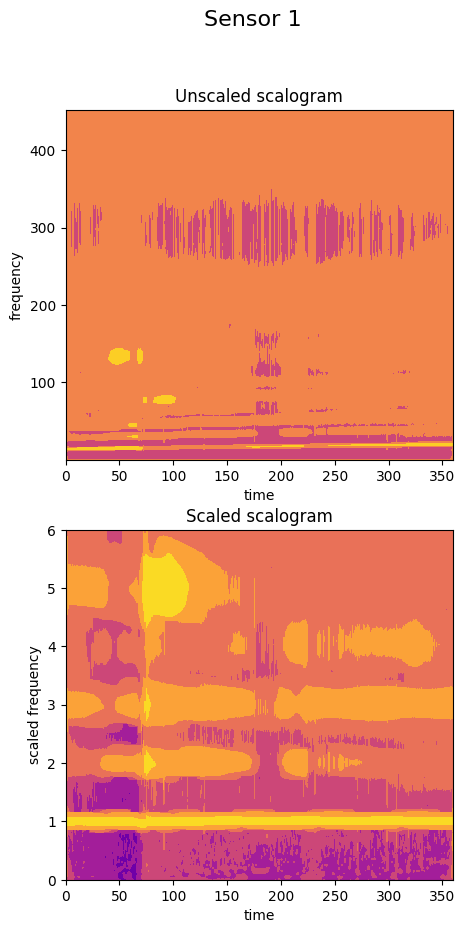

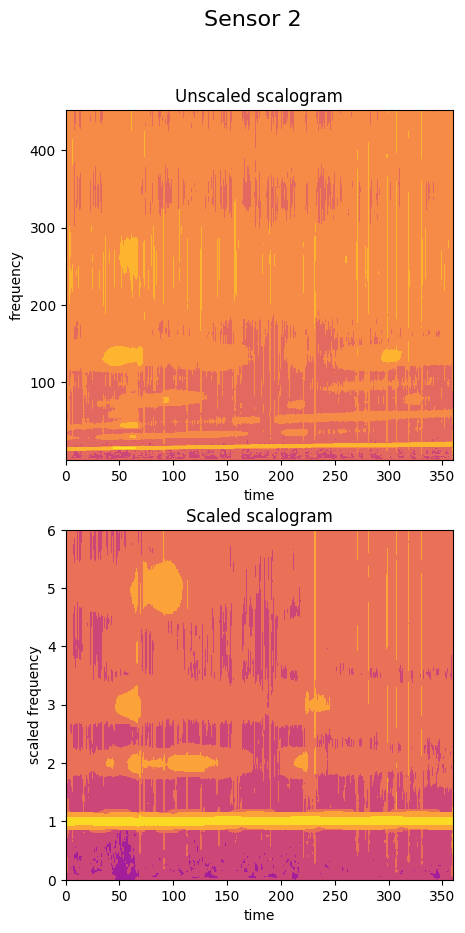

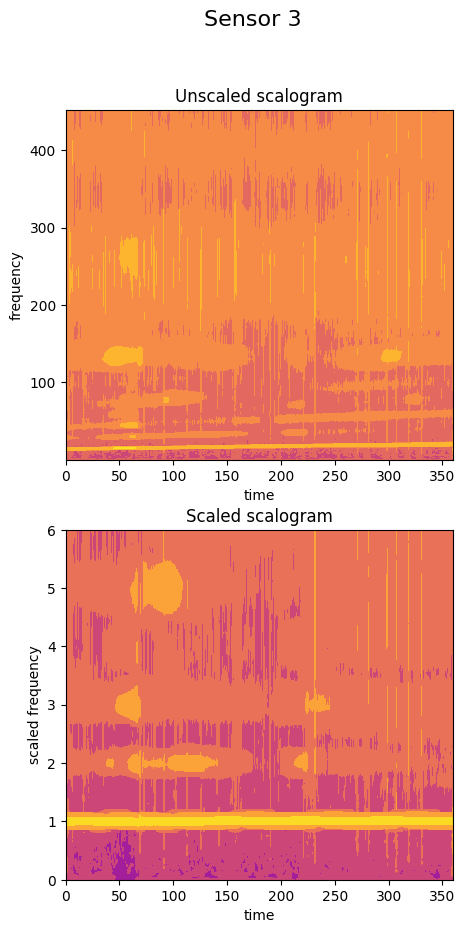

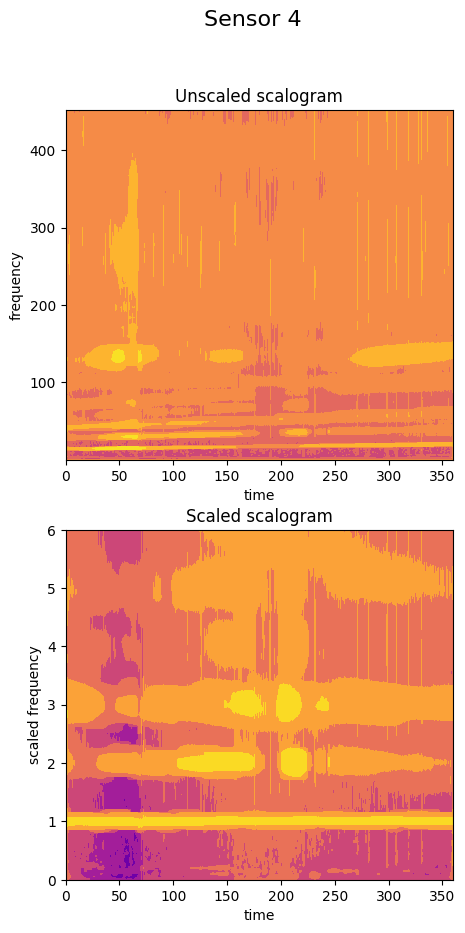

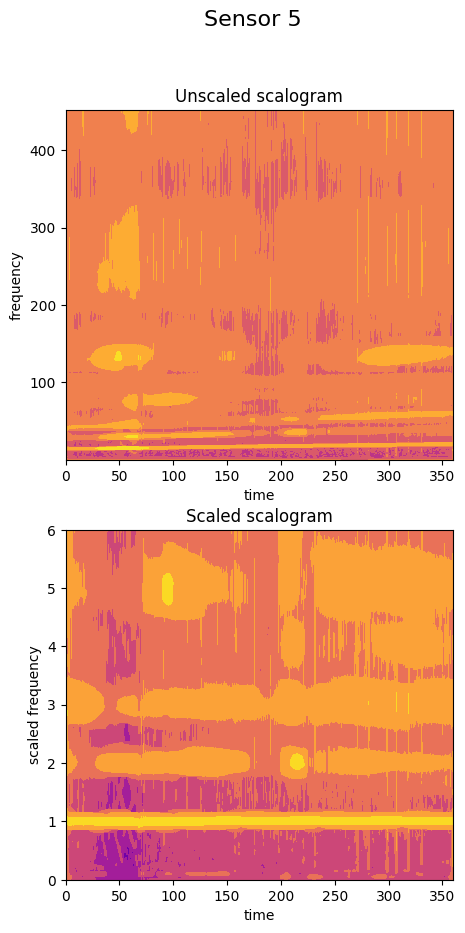

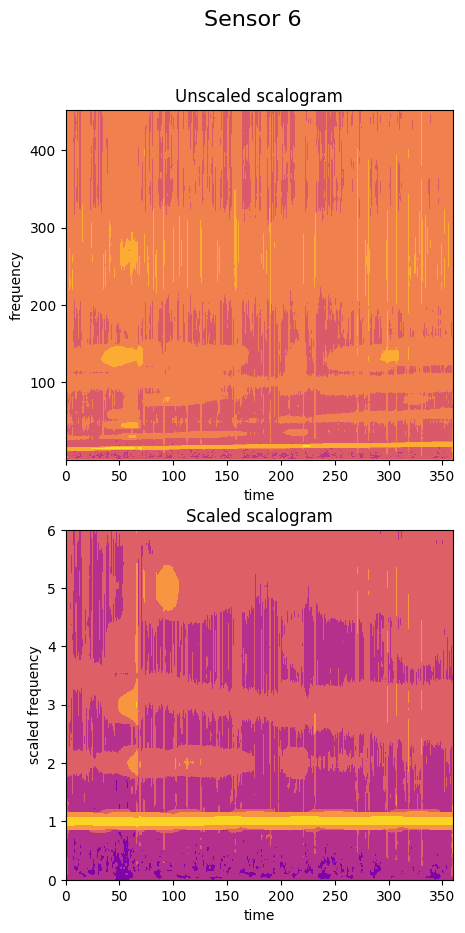

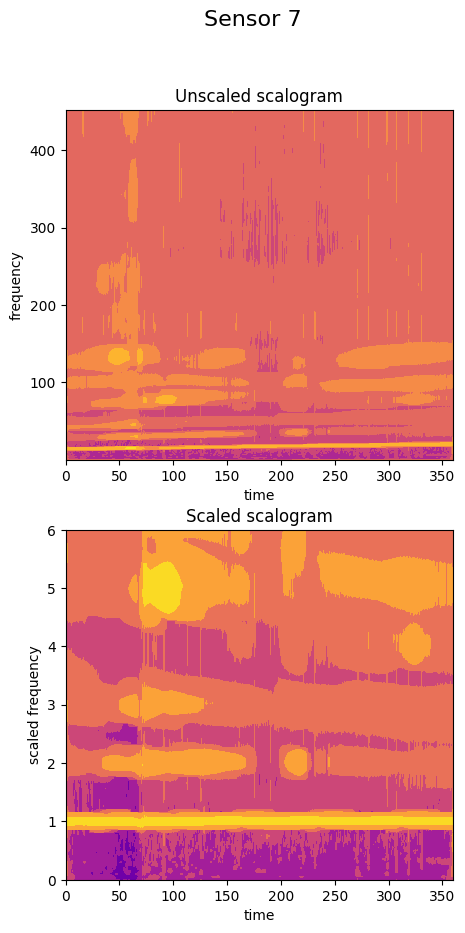

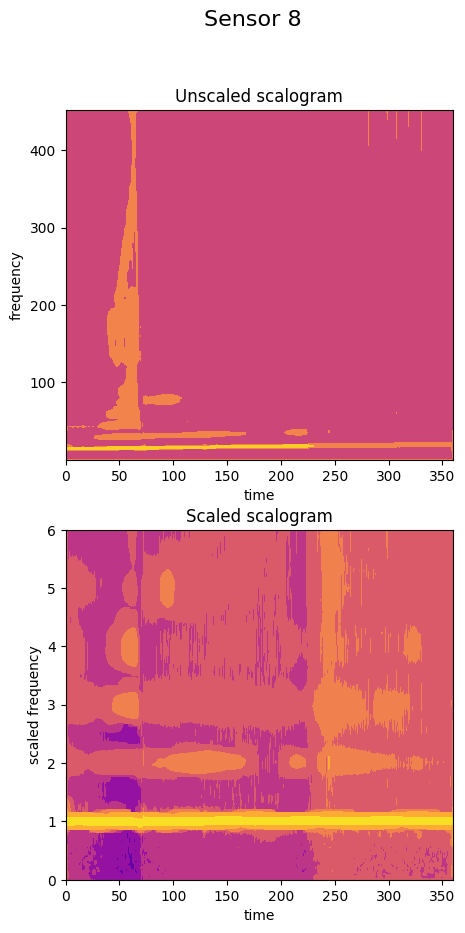

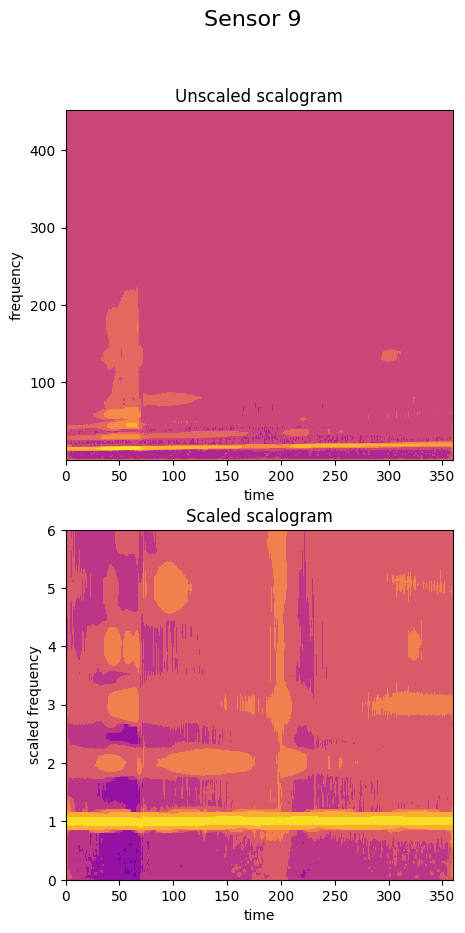

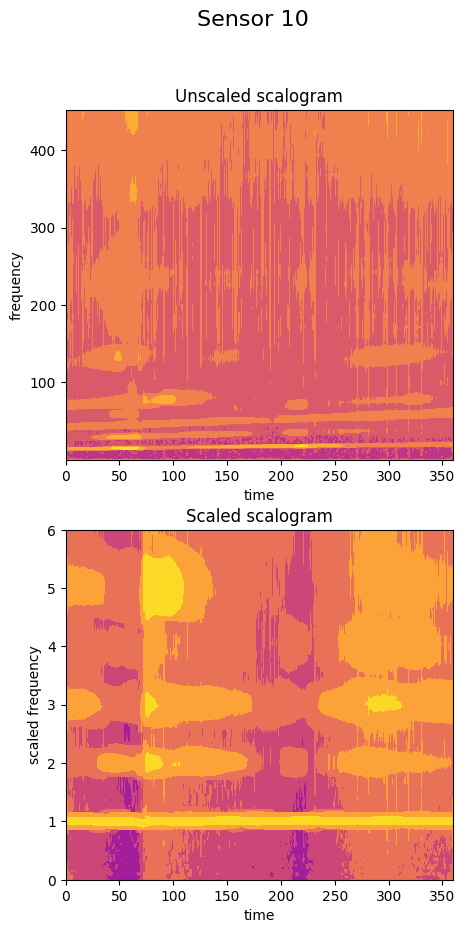

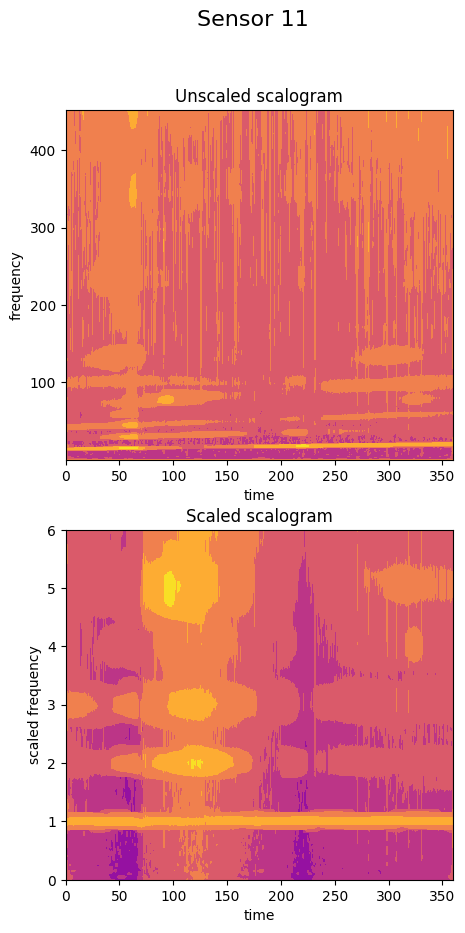

In [26]:
for i in range(11):
    fig, ax = plt.subplots(2, figsize=(5, 10))
    ax[0].contourf(T,freqs[i],cwts[i], cmap="plasma", norm=LogNorm())
    ax[0].set_title('Unscaled scalogram')
    ax[0].set_xlabel('time')
    ax[0].set_ylabel('frequency')
    ax[1].contourf(T,fnorm,scaledwts[i], cmap="plasma", norm=LogNorm())
    ax[1].set_title('Scaled scalogram')
    ax[1].set_xlabel('time')
    ax[1].set_ylabel('scaled frequency')
    fig.suptitle('Sensor '+ str(i+1), fontsize=16)
    plt.show()

# II. Comparison between ML and not ML methods

function to display the data

Uploadinding the 1:3 scalogram

In [4]:
cwt = np.genfromtxt('demo_files/demo-cwt-1_3.csv', delimiter=",", dtype=float)
freq = np.genfromtxt('demo_files/demo-freq-1_3.csv', delimiter=",", dtype=float)

f0 = 60/2/np.pi #3.5491552309492658 # initial frequency (Hz)
fend = 19.4646495401388 # final frequency (Hz)
fs = 516.54 # sampling frequency

scaled_coef1_3 = nml.scale(cwt, freq, f0, fend)

Uploadinding the 1:5 scalogram

In [5]:
cwt = np.genfromtxt('demo_files/demo-cwt-1_5.csv', delimiter=",", dtype=float)
freq = np.genfromtxt('demo_files/demo-freq-1_5.csv', delimiter=",", dtype=float)
f0 = 3.5491552309492658 #3.5491552309492658 # initial frequency (Hz)
fend = 84.26856349358127 # final frequency (Hz)
fs = 1109.878 # sampling frequency

scaled_coef1_5 = nml.scale(cwt, freq, f0, fend)
scaled_coef1_5 = scaled_coef1_5[:,340000:420000]

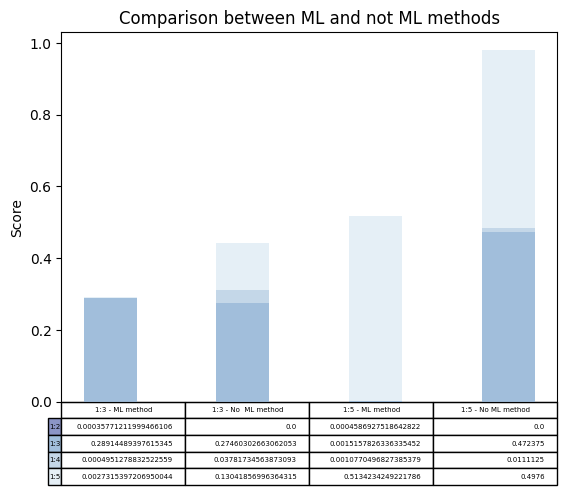

In [21]:
#imports
S1M1 = mlm.interaction(scaled_coef1_3, model=svmB)
S1M2 = nml.interaction2(scaled_coef1_3)
S2M1 = mlm.interaction(scaled_coef1_5, model=svmB)
S2M2 = nml.interaction2(scaled_coef1_5)
Sets=[S1M1,S1M2,S2M1,S2M2]

columns = ('1:3 - ML method', '1:3 - No  ML method', '1:5 - ML method', '1:5 - No ML method')

fig, ax = plt.subplots()
mt.method_compare(Sets, ax, columns)
plt.show()

In [30]:
l=np.linspace(0,100,len(scaled_coef1_5[0]))

In [33]:
cwt = np.genfromtxt('demo_files/demo-cwt-1_5.csv', delimiter=",", dtype=float)
freq = np.genfromtxt('demo_files/demo-freq-1_5.csv', delimiter=",", dtype=float)

In [36]:
cwt=cwt[:,340000:420000]

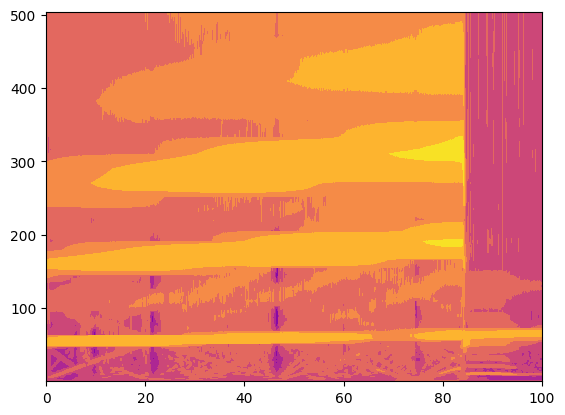

In [37]:
plt.contourf(l,freq,cwt, cmap="plasma", norm=LogNorm())

The same is done for the experimental data.\
The results are compared with the $\frac{n_{i}}{n_{1}}$ graphs


In [22]:
def rapport(ax,scaledwt):
    for i in range(2,6):
        l=nml.norm(scaledwt,i)
        ax.plot(l, label='N'+str(i)+'/N1')
        ax.set_xlabel('samples')
        ax.set_title('Ni/N1')
        ax.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


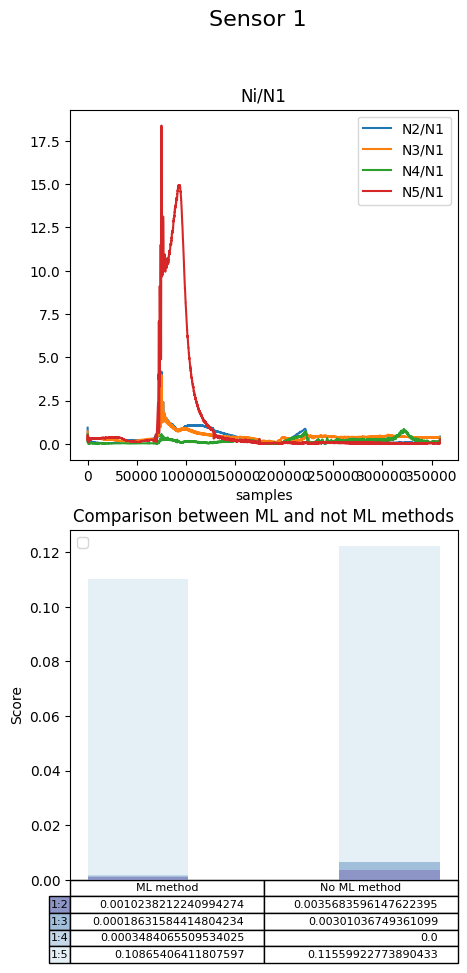

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


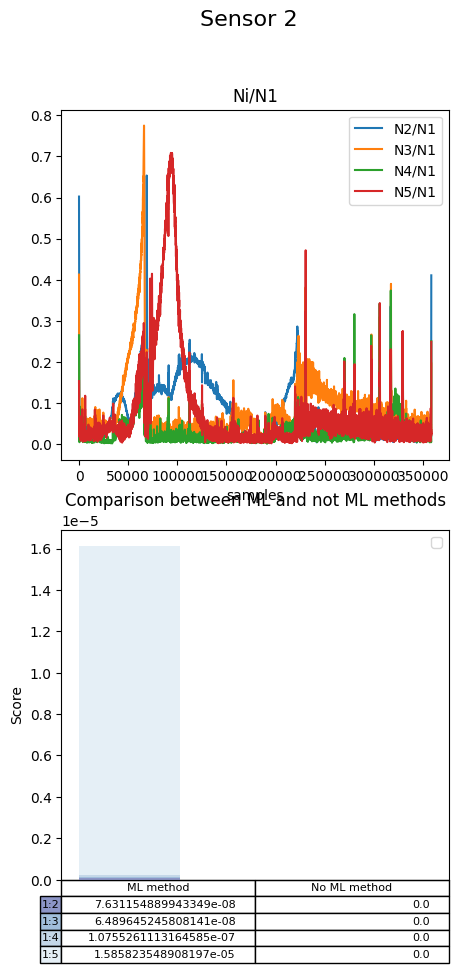

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


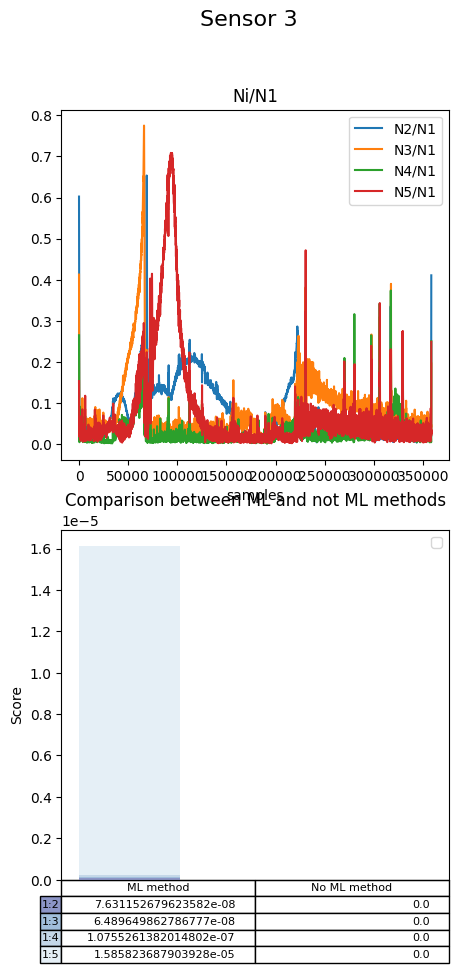

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


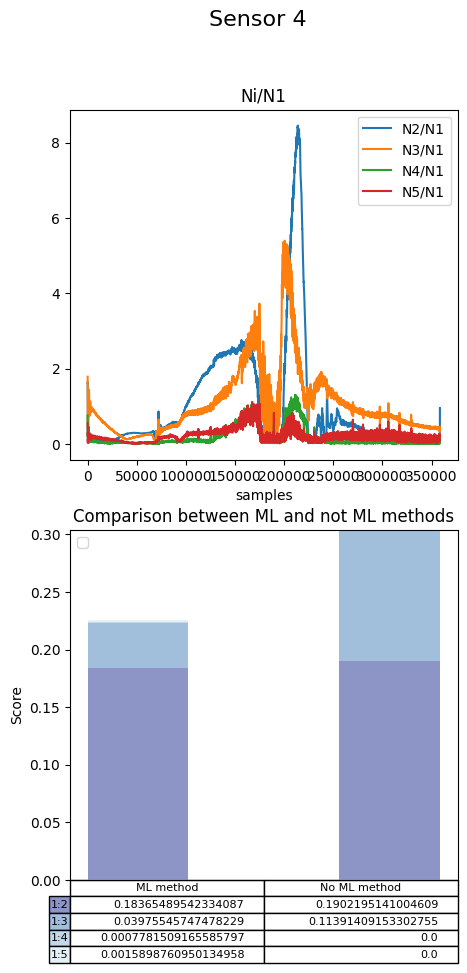

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


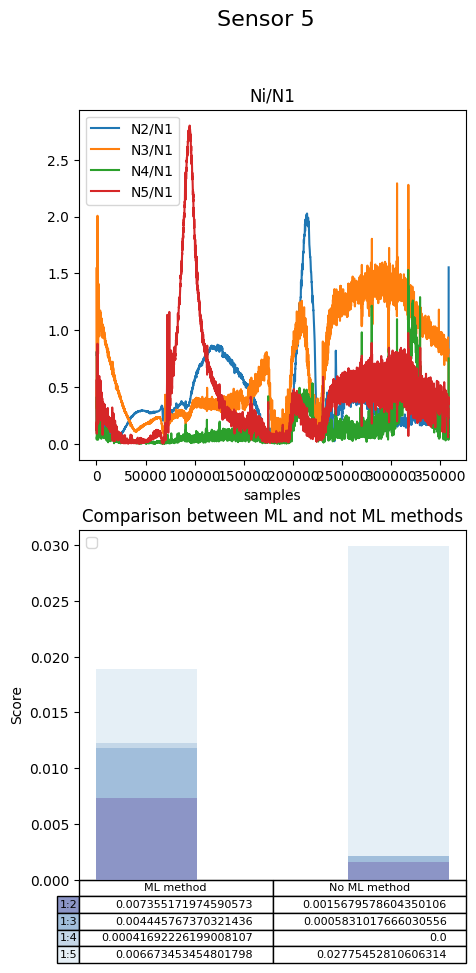

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


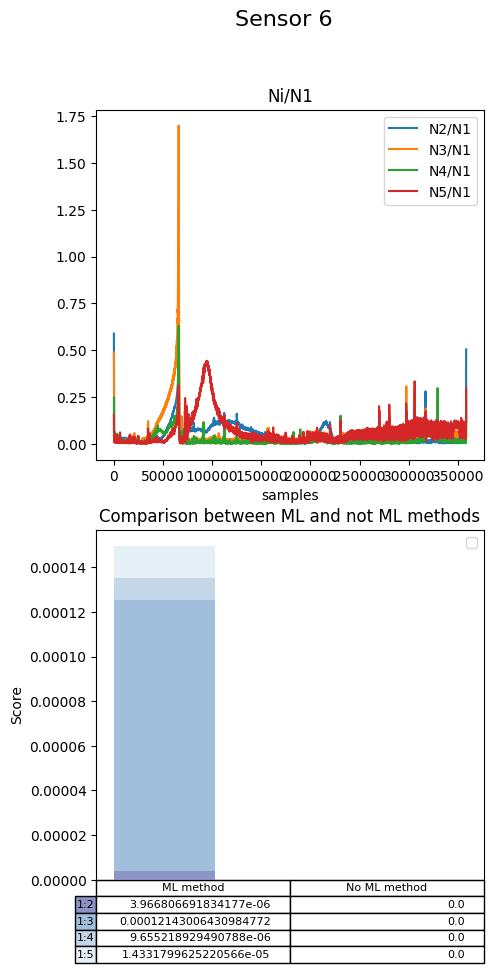

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


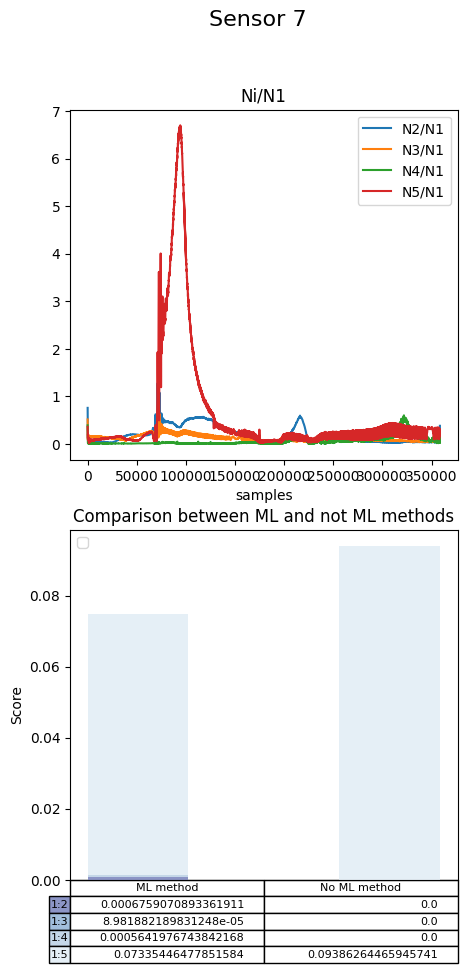

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


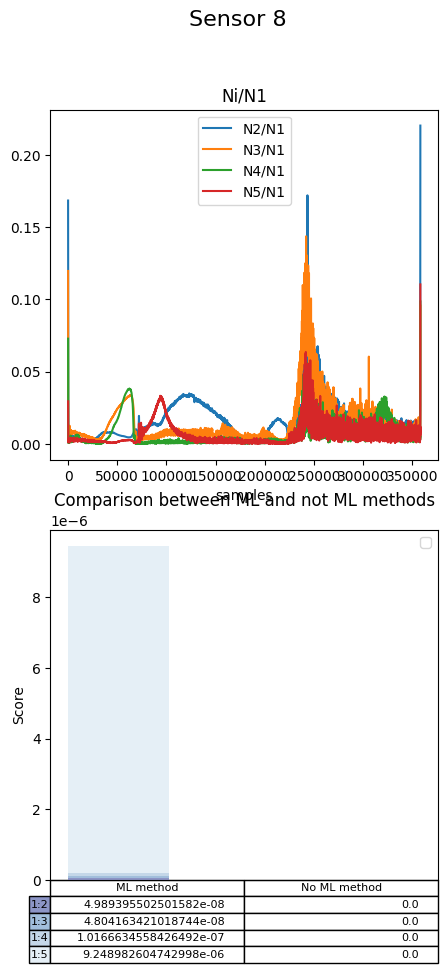

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


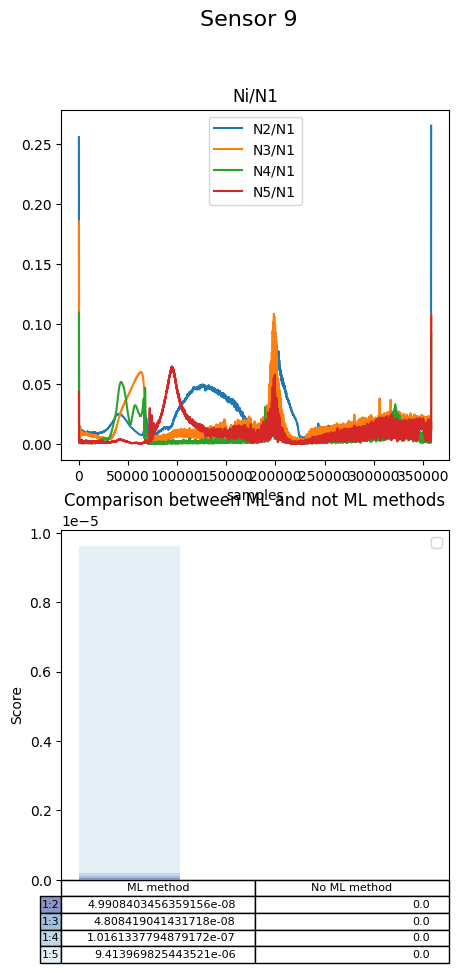

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


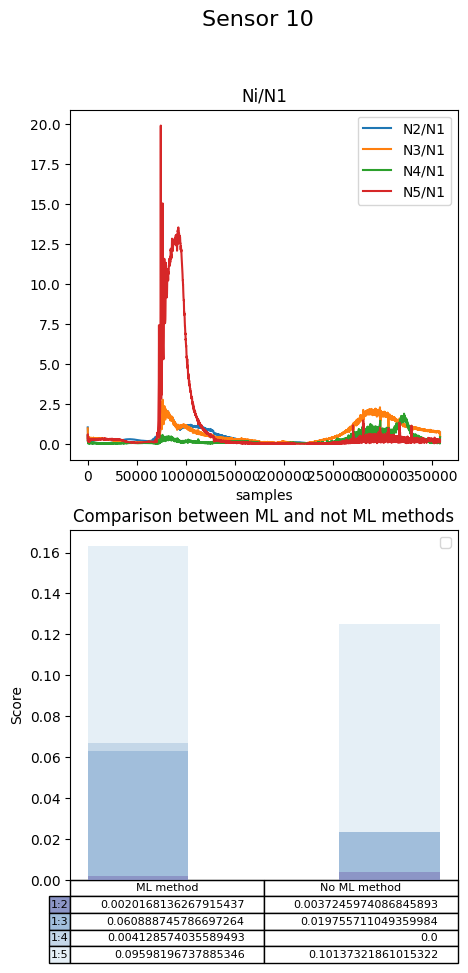

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


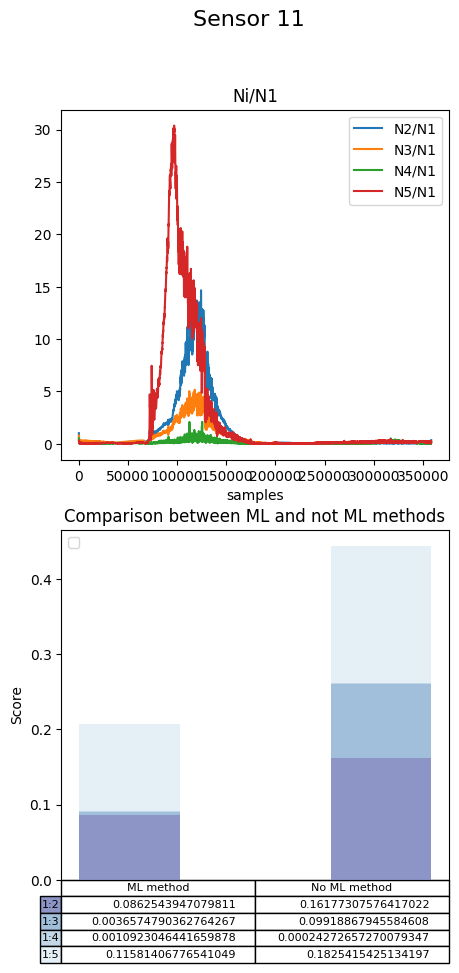

In [26]:
columns = ('ML method', 'No ML Method')
for i in range(11):
    fig, ax = plt.subplots(2, figsize=(5, 10))
    #Graph 1: Ni/N2
    rapport(ax[0],scaledwts[i])

    #Graph 2: ML/noML
    columns=('ML method', 'No ML method')
    Sets = [mlm.interaction(scaledwts[i], model=svmB), nml.interaction2(scaledwts[i])]
    mt.method_compare(Sets, ax[1], columns)
    fig.suptitle('Sensor '+ str(i+1), fontsize=16)
    plt.legend()
    plt.show()